#Problem 1.1 :Image Zooming 







In [ ]:
import matplotlib.pyplot as pl
import matplotlib.image as mp


In [ ]:
sp_img = mp.imread('/content/drive/MyDrive/diphw1/sp.jpg')
lena_fig=mp.imread('/content/drive/MyDrive/diphw1/lena.jpg')
pic= mp.imread('/content/drive/MyDrive/diphw1/pic.jpg')
print(sp_img, lena_fig, pic)

[[[ 21 255   8]
  [ 21 255   8]
  [ 21 255   8]
  ...
  [ 21 255   8]
  [ 21 255   8]
  [ 21 255   8]]

 [[ 21 255   8]
  [ 21 255   8]
  [ 21 255   8]
  ...
  [ 21 255   8]
  [ 21 255   8]
  [ 21 255   8]]

 [[ 21 255   8]
  [ 21 255   8]
  [ 21 255   8]
  ...
  [ 21 255   8]
  [ 21 255   8]
  [ 21 255   8]]

 ...

 [[ 25 249  13]
  [ 25 249  13]
  [ 25 249  13]
  ...
  [ 25 249  13]
  [ 25 249  13]
  [ 25 249  13]]

 [[ 81 255  77]
  [ 81 255  77]
  [ 81 255  77]
  ...
  [ 80 255  76]
  [ 80 255  76]
  [ 80 255  76]]

 [[  0 137   2]
  [  0 137   2]
  [  0 137   2]
  ...
  [  0 137   0]
  [  0 137   0]
  [  0 137   0]]] [[[160 160 160]
  [160 160 160]
  [160 160 160]
  ...
  [169 169 169]
  [155 155 155]
  [130 130 130]]

 [[160 160 160]
  [161 161 161]
  [160 160 160]
  ...
  [167 167 167]
  [153 153 153]
  [128 128 128]]

 [[161 161 161]
  [161 161 161]
  [160 160 160]
  ...
  [172 172 172]
  [156 156 156]
  [130 130 130]]

 ...

 [[ 50  50  50]
  [ 49  49  49]
  [ 56  56  56]
  ..

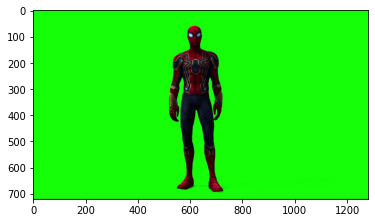

In [ ]:
#display image1 as result
disimg = pl.imshow(sp_img)

In [ ]:
import numpy as npy
from scipy.ndimage import zoom

In [ ]:
#cz= clip zooming, zf= zoom factor, x=high, y=width, zt= zoom , t=top, l=left, o=out, t= trim off the extra pixel,tt=trim top, tl = trim left 
def cz(lena,zf, **kwargs):
  x,y=sp_img.shape[:2]
  zt=(zf,)*2+(1,)*(sp_img.ndim-2)
  if zf<1:
    zx=int(npy.round(x*zf))
    zy=int(npy.round(y*zf))
    t=(x-zx)//2
    l=(y-zy)//2
    o= npy.zeros_like(sp_img)
    o[t:t+zx, l:l+zy] = zoom(sp_img, zt, **kwargs)
  elif zf >1:
    zx=int(npy.round(x/zf))
    zy=int(npy.round(y/zf))
    t=(x-zx)//2
    l=(y-zy)//2
    o = zoom(sp_img[t:t+zx, l:l+zy], zt, **kwargs)
    tt = ((o.shape[0] - x) // 2)
    tl = ((o.shape[1] - y) // 2)
    o= o[tt:tt+x, tl:tl+y]
  else:
    o= sp_img
  return o


    



In [ ]:
z1 = cz(sp_img, 1.5)
z2 = cz(sp_img, 2)

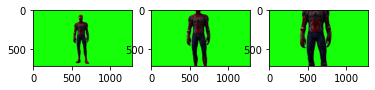

In [ ]:
image, axis = pl.subplots(1, 3)
axis[0].imshow(sp_img)
axis[1].imshow(z1)
axis[2].imshow(z2)

In [ ]:
#cz= clip zooming, zf= zoom factor, x=high, y=width, zt= zoom , t=top, l=left, o=out, t= trim off the extra pixel,tt=trim top, tl = trim left 
def cz(lena,zf, **kwargs):
  x,y=pic.shape[:2]
  zt=(zf,)*2+(1,)*(pic.ndim-2)
  if zf<1:
    zx=int(npy.round(x*zf))
    zy=int(npy.round(y*zf))
    t=(x-zx)//2
    l=(y-zy)//2
    o= npy.zeros_like(pic)
    o[t:t+zx, l:l+zy] = zoom(sp_img, zt, **kwargs)
  elif zf >1:
    zx=int(npy.round(x/zf))
    zy=int(npy.round(y/zf))
    t=(x-zx)//2
    l=(y-zy)//2
    o = zoom(pic[t:t+zx, l:l+zy], zt, **kwargs)
    tt = ((o.shape[0] - x) // 2)
    tl = ((o.shape[1] - y) // 2)
    o= o[tt:tt+x, tl:tl+y]
  else:
    o= pic
  return o

In [ ]:
w1 = cz(pic, 1.5)
w2 = cz(pic, 2)

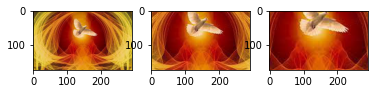

In [ ]:

image, axis = pl.subplots(1, 3)
axis[0].imshow(pic)
axis[1].imshow(w1)
axis[2].imshow(w2)

In [ ]:
print(pic.shape)
print(w2.shape)

(174, 290, 3)
(174, 290, 3)


#Problem 1.2: Image Zooming By 1.5 (bilinear)

In [ ]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scipy import ndimage

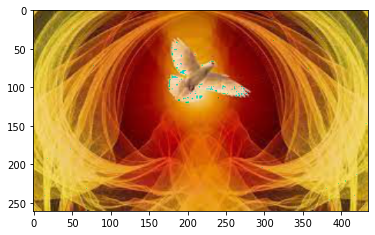

In [ ]:
def GenerateBilinearPixel(imgAr, X, Y):
	o = []

	#Find a number's integer and fractional components.
	modvXi = int(X)
	modvYi = int(Y)
	modvXf = X - modvXi
	modvYf = Y - modvYi
	modvXiPlusOneLimt = min(modvXi+1,imgAr.shape[1]-1)
	modvYiPlusOneLimt = min(modvYi+1,imgAr.shape[0]-1)

	#Find the four corners of pixels
	for channel in range(imgAr.shape[2]):
		b0 = imgAr[modvYi, modvXi, channel]
		br0 = imgAr[modvYi, modvXiPlusOneLimt, channel]
		t0 = imgAr[modvYiPlusOneLimt, modvXi, channel]
		tr0 = imgAr[modvYiPlusOneLimt, modvXiPlusOneLimt, channel]
	
		#Calculating interpolation
		b1 = modvXf * br0 + (1. - modvXf) * b0
		t1 = modvXf * tr0 + (1. - modvXf) * t0
		pxf_1 = modvYf * t1 + (1. - modvYf) * b1
		o.append(int(pxf_1+1.5))

	return o

if __name__=="__main__":
	
	Bilinear_Image = mp.imread("/content/drive/MyDrive/diphw1/pic.jpg")
	zoomShape = list(map(int, [Bilinear_Image.shape[0]*1.5, Bilinear_Image.shape[1]*1.5, Bilinear_Image.shape[2]]))
	zoomImg = npy.empty(zoomShape, dtype=npy.uint8)
	rowScale_value = float(Bilinear_Image.shape[0]) / float(zoomImg.shape[0])
	colScale_value = float(Bilinear_Image.shape[1]) / float(zoomImg.shape[1])

	for row in range(zoomImg.shape[0]):
		for col in range(zoomImg.shape[1]):
			Original_image_r = row * rowScale_value #getthe position in original image
			Original_image_c = col * colScale_value
			zoomImg[row, col] = GenerateBilinearPixel(Bilinear_Image, Original_image_c, Original_image_r)

	pl.imshow(zoomImg)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

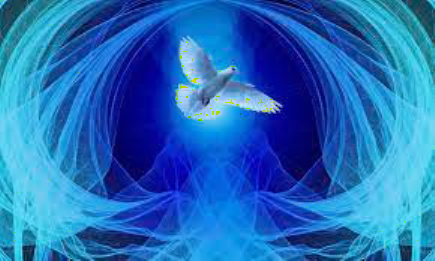

In [ ]:
cv2_imshow(zoomImg)

computational complxity bilinear and nearest neighbor

In [ ]:
print(zoomImg.shape)

(261, 435, 3)


In [ ]:
print(pic.shape)

(174, 290, 3)
